# C++提高编程

## 模板
1. 模板不可以直接使用，他只是一个框架
2. 模板不是万能的

### 函数模板
作用：建立一个通用函数，其函数返回值类型和形参类型可以不具体指定，用一个**虚拟的类型**来代表

语法：
```cpp
template<typename T>

```
解释：
1. template --声明创建模板
2. typename --表明其后面的符号是一种数据类型，可以用`class`代替
3. T --通用的数据类型，名称可以替换，通常为大写字母\

两种方式`使用函数模板`:
1. 自动类型推导  `mySwap(a, b)`，必须推导出一致的数据类型T才可以使用
2. 显式指定类型 `mySwap<float>(c, d)`模板必须要确定出T的数据类型才可以使用

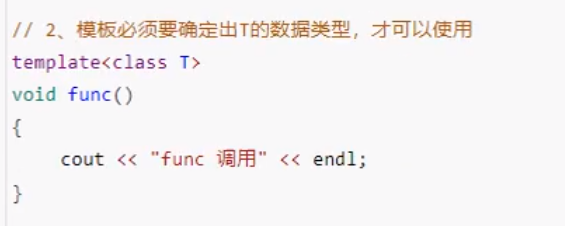


In [4]:
#include<iostream>

using namespace std;

//函数模板
//1.交换两个整形函数实现

//2.交换两个浮点型函数实现

In [9]:
template<typename T> //声明一个模板，告诉编译器后面代码中紧跟着的T不要报错，T是一个通用数据类型
void mySwap(T &a, T &b){
    T temp = a;
    a = b;
    b = temp;
}

In [31]:
void test01(){
    int a = 10;
    int b = 20;
    
    float c = 1.1;
    float d = 2.2;
    
    mySwap(a, b); //自动类型推导
    mySwap(c, d); //显式指定类型
    
//     cout << "a, b" <<a;
//     cout << "c, d" <<c;
    cout<<"a = "<<a;
}

In [22]:
test01();

a = 20

### 普通函数与函数模板的区别
1. 普通函数调用时，可以发生自动类型转换(**隐式类型转换**)
2. 函数模板调用时，如果利用自动类型推导，不会发生隐式类型转换
3. 如果利用显示指定类型的方式，可以发生隐式类型转换

```cpp
template<typename T>
T myAdd(T a, T b){
    return a + b;
}
void test01(){
    int a = 10;
    int b = 20;
    char c = 'c';
    
    myAdd(a ,b); //可以运行
    myAdd(a, c)l //不能发生隐式类型转换
    myAdd<int>(a, c); //能发生隐式类型转换

}
```

### 普通函数与函数模板的调用规则
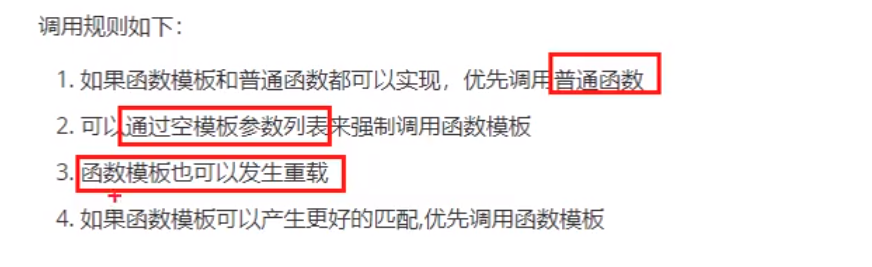
```cpp
//通过空模板参数列表，强制调用函数模板
myAdd<>();
```
**在实际过程中，不要出现普通函数和函数模板的同名情况**

### 模板的局限性
模板并不是万能的，有些特定的数据类型，需要用具体化方式做特殊实现

当T判断为某一特殊类型如自定义的时候，需要具体化函数模板的实现
```cpp
template<> bool myCompare(Person &p1, Person &p2){
    if (p1.m_Name == p2.m_Name && p1.m_Age == p2.m_Age){
            return true;
    }
    else{
            return false;
    }
}
```
1. 利用具体化的模板，可以解决自定义类型的通用化
2. 学习模板并不是为了写模板，而是为了能够在STL中运用系统提供的模板

## 类模板

### 类模板语法
类模板作用：建立一个通用类，类中的成员，数据类型可以不具体指定，用一个通用类型T指定
```cpp
template<class NameType, class AgeType>
class Person{
public:
    Person(NameType name, AgeType age){
       this->m_name = name;
       this->m_age = age;
    }
    
    NameType m_name;
    AgeType m_age;
};
```

In [34]:
template<class NameType, class AgeType>
class Person{
public:
    Person(NameType name, AgeType age){
       this->m_name = name;
       this->m_age = age;
    }
    
    void show_info(){
        cout<<"name："<< this->m_name <<"age:"<<this->m_age;
    
    }
    NameType m_name;
    AgeType m_age;
};

In [36]:
void test01(){
    Person<string, int> p1("孙悟空", 9999);
    p1.show_info();
    
    
}
test01();

name：孙悟空age:9999

## 类模板和函数模板的区别
1. 类模板没有自动类型推导的使用方式
2. **类模板在模板参数列表中可以有默认参数**

```cpp
template<class NameType, class AgeType = int> // 默认AgeType为int

```

In [70]:
template<class NameType, class AgeType>
class Student{
public:
    Student(NameType name, AgeType age){
       this->m_name = name;
       this->m_age = age;
    }
    
    void show_info(){
        cout<<"name："<< this->m_name <<"age:"<<this->m_age;
    
    }
    NameType m_name;
    AgeType m_age;
};

In [71]:
void test01(){
    Student<string, int> p1("孙悟空", 9999);  //只能用显示指定数据类型
    p1.show_info();
    
    
}
test01();

name：孙悟空age:9999

In [40]:
//类模板在模板参数列表中可以有默认参数
template<class NameType, class AgeType = int> // 默认AgeType为int
class Student{
public:
    Student(NameType name, AgeType age){
       this->m_name = name;
       this->m_age = age;
    }
    
    void show_info(){
        cout<<"name："<< this->m_name <<"age:"<<this->m_age;
    
    }
    NameType m_name;
    AgeType m_age;
};

In [56]:
void test02(){
    Student<string> s1("猪八戒", 8888);
    s1.show_info();
}

test02();

name：猪八戒age:8888

### 类模板中成员函数创建时机
类模板中成员函数和普通类中成员函数创建时机是有区别的
1. 普通类中的成员函数一开始就可以创建
2. 类模板中的成员函数在调用时才创建

### 类模板对象做函数参数
三种传入方式：
1. 指定传入的类型：直接显示对象的数据类型  **最常用**
2. 参数模板化：将对象中的参数变为模板进行传递
3. 整个类模板化：将这个对象类型模板进行传递

In [1]:
#include<iostream>
#include<string>

using namespace std;

In [2]:
template<class T1, class T2>
class Person{
public:
    Person(T1 name, T2 age){
       this->m_name = name;
       this->m_age = age;
    }
    
    void show_info(){
        cout<<"name："<< this->m_name <<"age:"<<this->m_age;
    
    }
    T1 m_name;
    T2 m_age;
};

In [3]:
//类模板对象做函数参数
//1. 指定传入类型
void printPerson1( Person<string, int> &p){
    p.show_info();
}


In [4]:
void test01(){
    Person<string, int> p("孙悟空", 999);
    printPerson1(p);
}

In [5]:
test01();

name：孙悟空age:999

In [8]:
//参数模板化
template<class T1, class T2>
void printPerson2(Person<T1, T2> &p){
    p.show_info();
    cout<<"T1的类型为:"<<typeid(T1).name();

}

In [10]:
void test02(){
    Person<string, int> p1("猪八戒", 888);
    printPerson2(p1);
    
}
test02();

name：猪八戒age:888T1的类型为:NSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE

In [11]:
//将整个类模板化
template<class T>
void printPerson3(T  &p){
    p.show_info();
    
}

In [12]:
void test03(){
    Person<string, int> p2("唐僧", 25);
    printPerson3(p2);
    
}
test03();

name：唐僧age:25

### 类模板与继承
当类模板碰到继承时，需要注意以下几点：
1. 当子类继承的父类是一个类模板时，子类在声明的时候，要指定出父类中T的类型
2. 如果不指定，编译器无法给子类分配内存
3. 如果想灵活指定出父类中T的类型，子类也需变为类模板

In [13]:
//类模板与继承
template<class T>
class Base{
    T m;
    
};


In [14]:
class Son1 :public Base<int> //必须指定父类中T的类型
{
    
};

In [15]:
//如果想要灵活指定父类的T类型，子类也需要变类模板
template<class T1, class T2>
class Son2 :public Base<T1>{
public:
    Son2
    T2 obj;
};

In [16]:
void test01(){
    Son2<int, char> s2;
}